# Import Libraries

Rreference:
- https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
# Loading the dataset
dataset = pd.read_csv('Data/DC_Prop_Condominium_Clustering.csv', index_col= 'Unnamed: 0')
dataset = dataset.reset_index()

In [4]:
dataset.shape

(40316, 20)

In [5]:
dataset.head()

,index,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,QUALIFIED,SALE_NUM,FIREPLACES,USECODE,LANDAREA,LIVING_GBA,WARD,SalevYB,SalevYI
0,0,2,0,2,1,4,2,1911.0,2016.0,1919,599900.0,0,2,0,16,716,1084.0,0,105.0,97
1,1,2,0,2,1,4,2,1911.0,2016.0,1919,677900.0,1,2,0,16,844,1267.0,0,106.0,98
2,2,2,0,2,1,4,2,1911.0,2016.0,1919,659900.0,1,2,0,16,763,1151.0,0,105.0,97
3,3,2,0,2,1,4,2,1911.0,2016.0,1919,645000.0,1,2,0,16,716,1080.0,0,105.0,97
4,4,2,0,2,1,4,2,1911.0,2016.0,1919,690900.0,0,2,0,16,923,1405.0,0,106.0,98


In [6]:
data = 'BATHRM', 'LANDAREA', 'YR_RMDL', 'USECODE', 'EYB', 'LIVING_GBA', 'SalevYB', 'AYB', 'PRICE'

X = dataset.loc[:2000, data].values

In [7]:
X.shape

(2001, 9)

## KNN

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
predictions = kmeans.fit_predict(X)
# Ekstrak informasi


score_kemans_s = silhouette_score(X, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(X, kmeans.labels_)
score_kemans_d = davies_bouldin_score(X, predictions)
score_kemans_i = kmeans.inertia_
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
print(f'Inrtia = {score_kemans_i:.4f}')

Silhouette Score: 0.6677
Calinski Harabasz Score: 4611.1489
Davies Bouldin Score: 0.4521
Inrtia = 45534235191786.4922


In [14]:
!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4


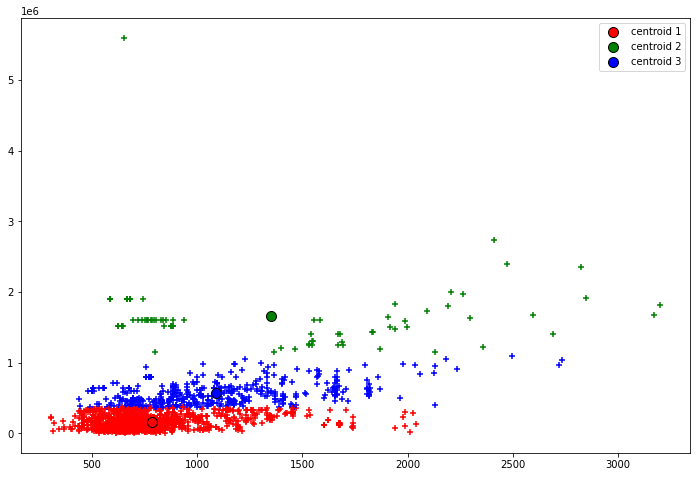

In [ ]:
c_sklearn = kmeans.labels_
new_z_sklearn = kmeans.cluster_centers_

plt.figure(figsize=(12,8))
for i in range(len(c_sklearn)):
    if c_sklearn[i] == 0:
        plt.scatter(X[i,5], X[i,8], c='r', marker='+')
    elif c_sklearn[i] == 1:
        plt.scatter(X[i,5], X[i,8], c='g', marker='+')
    else:
        plt.scatter(X[i,5], X[i,8], c='b', marker='+')

plt.scatter(new_z_sklearn[0,5], new_z_sklearn[0,8], c='r', edgecolor='k', s=100, label='centroid 1')
plt.scatter(new_z_sklearn[1,5], new_z_sklearn[1,8], c='g', edgecolor='k', s=100, label='centroid 2')
plt.scatter(new_z_sklearn[2,5], new_z_sklearn[2,8], c='b', edgecolor='k', s=100, label='centroid 3')


plt.legend()
plt.show()


# Hierarchical Clustering

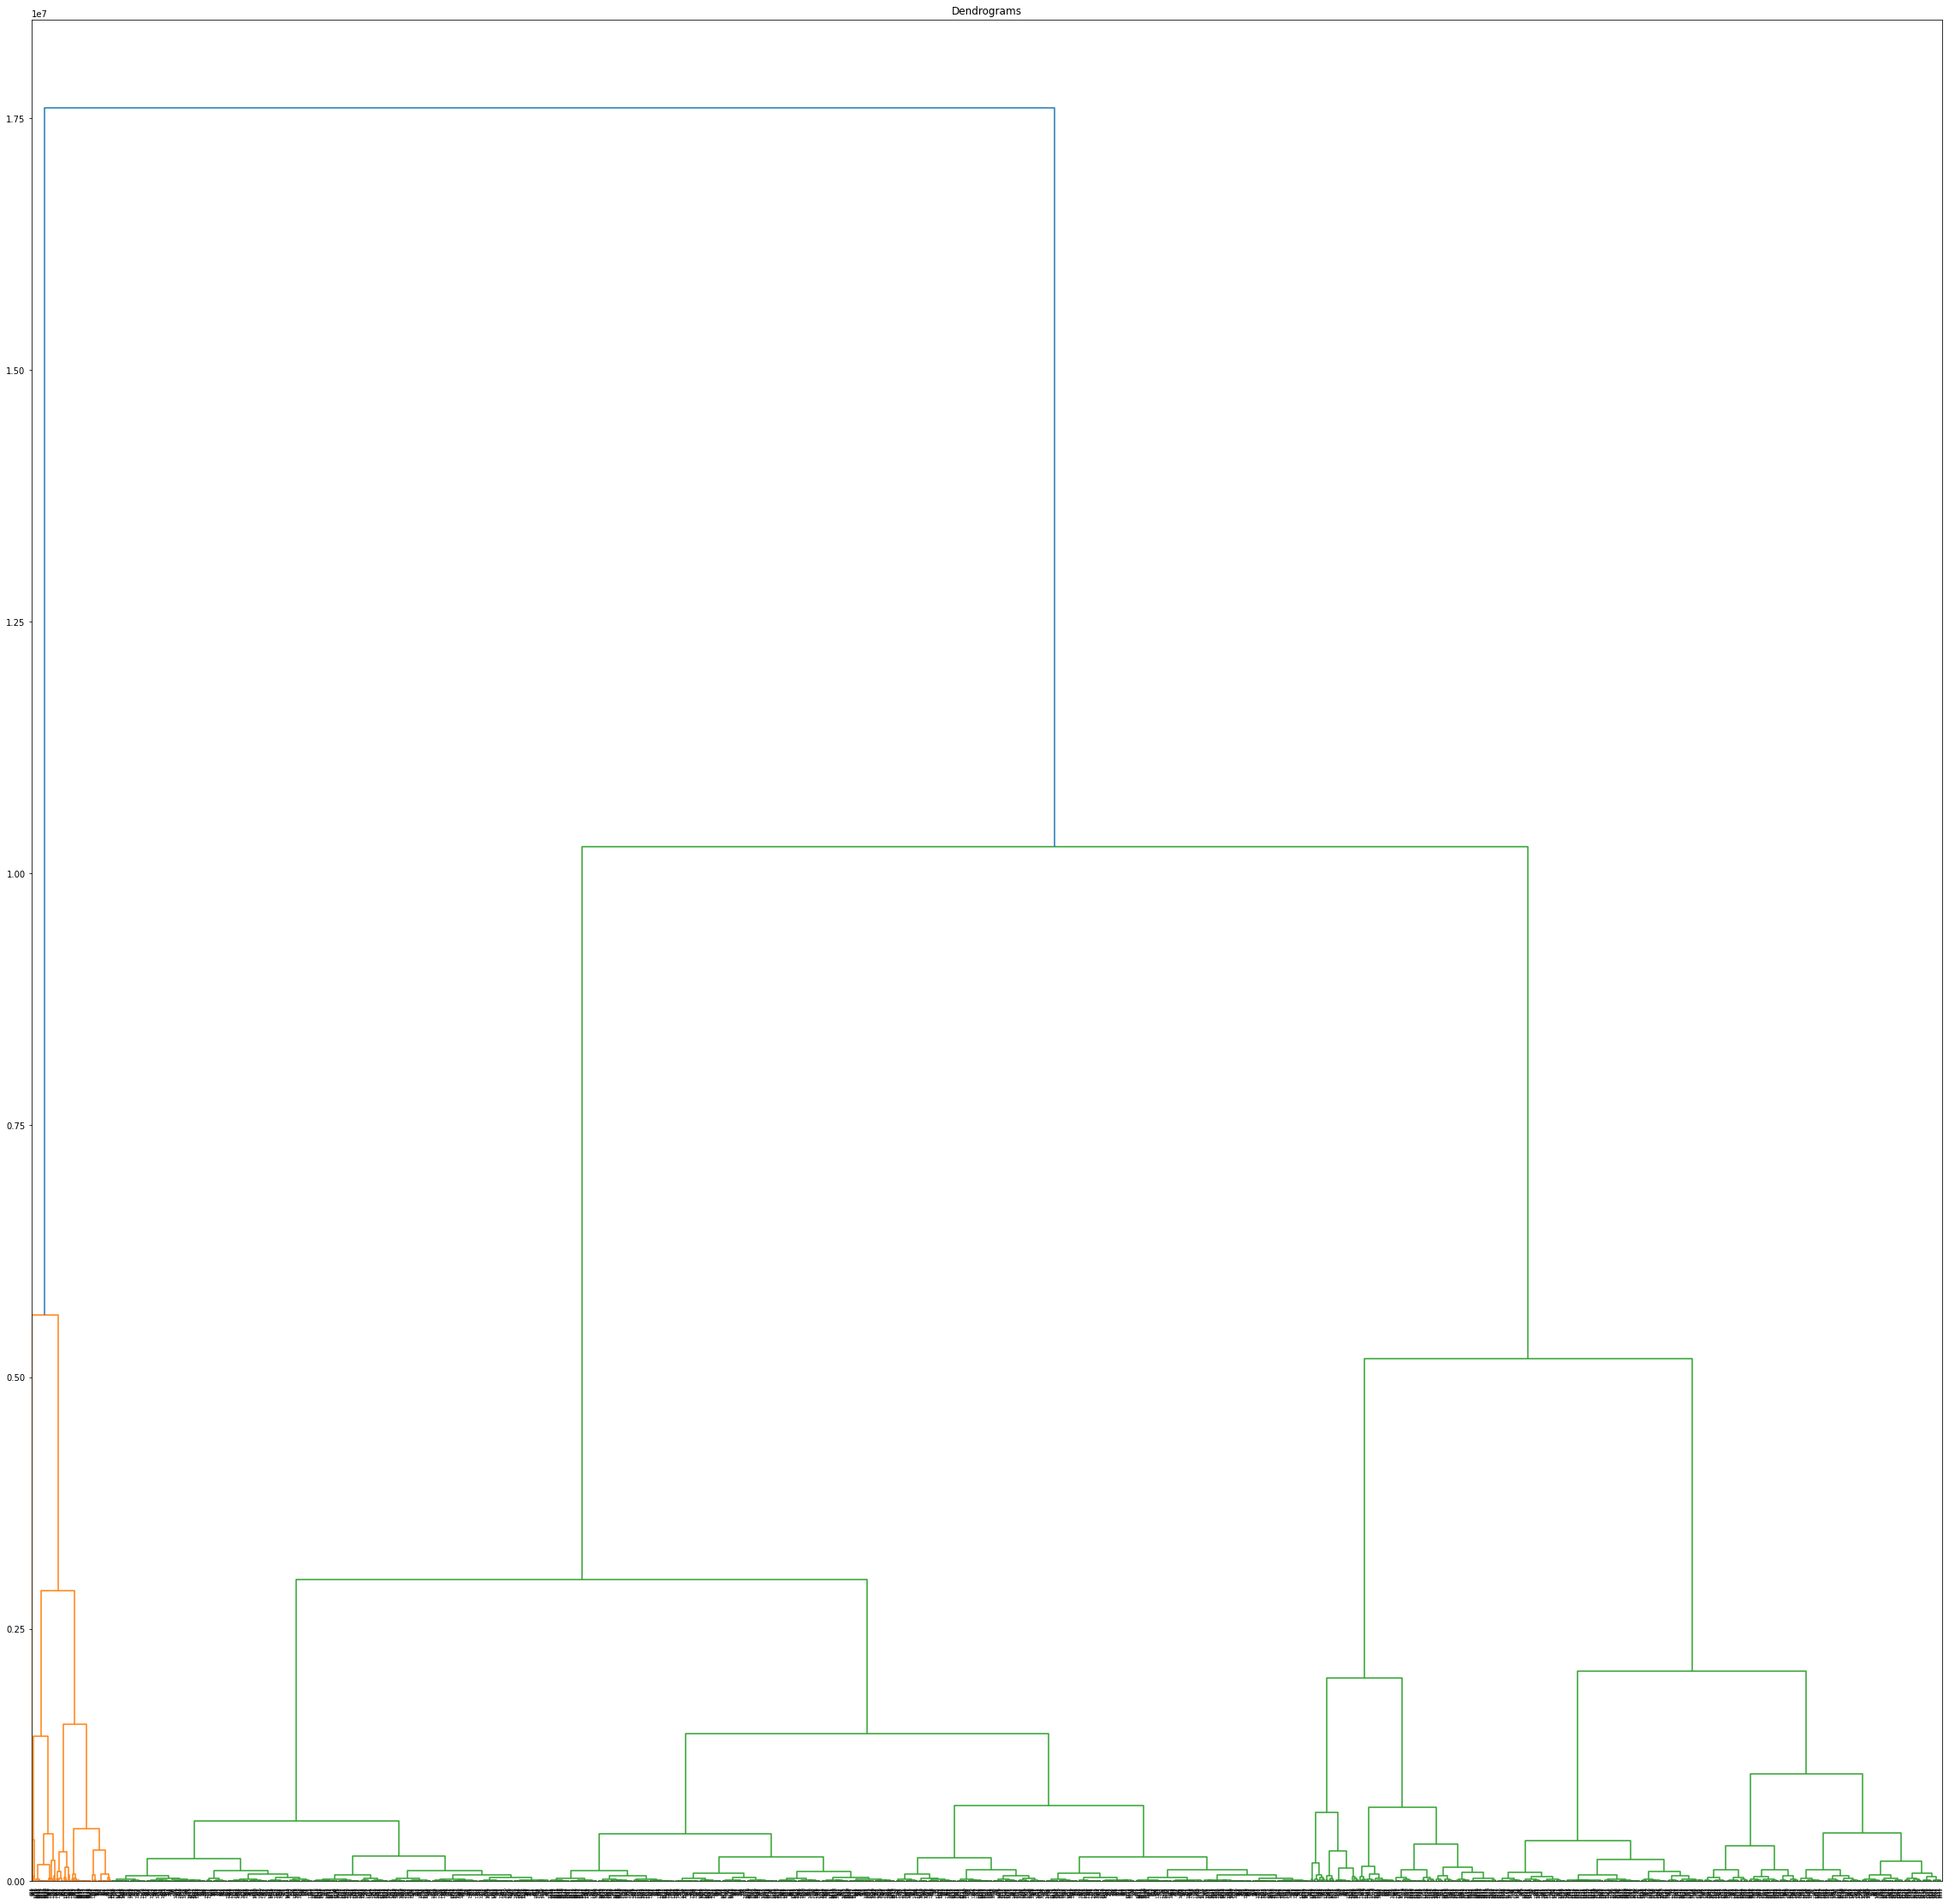

In [30]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(40,40))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [33]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit(X)
yhat_2 = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(X, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(X, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(X, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.6258
Calinski Harabasz Score: 4592.2298
Davies Bouldin Score: 0.3785


# DBSCAN

5051.036428298652


<Figure size 360x360 with 0 Axes>

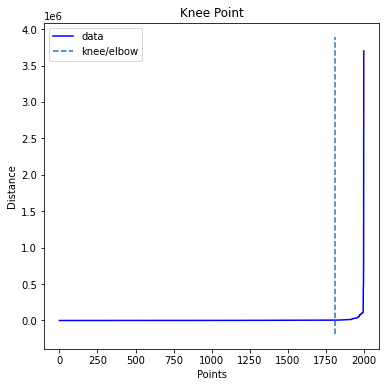

In [35]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

In [42]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset

# define the model
model = DBSCAN(eps=5051.036428298652, min_samples= 18)
# rule of thumb for min_samples: 2*len(X.columns)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(X, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(X, yhat)
score_dbsacn_d = davies_bouldin_score(X, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.2939
Calinski Harabasz Score: 320.3073
Davies Bouldin Score: 1.5120


# Gaussian Mixture Modelling (GMM)

In [43]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 26,covariance_type= "full", random_state = 10)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(X, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(X, yhat)
score_dbsacn_d = davies_bouldin_score(X, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: -0.5499
Calinski Harabasz Score: 374.4068
Davies Bouldin Score: 3.7613


# Other

In [ ]:
#Add cluster result to Dataframe
df_pca['cluster']=cluster_hc

In [21]:
x_df = pd.DataFrame(X, columns = data)

In [22]:
y_df = pd.DataFrame (y_hc, columns = ['cluster'])

In [23]:
y_df

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
9996,0
9997,0
9998,0
9999,0


In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(df_pca.iloc[:,0],df_pca.iloc[:,1],hue=df_pca['cluster'])
plt.title('PCA Result', fontsize = 20)
plt.show()

In [25]:
# #Merge Country and Cluster
# pca_cluster_hc = pd.concat([data['country'],df_pca['cluster']], axis=1, join='outer')
# pca_cluster_hc.sample(5)

In [26]:
x_df_clust = pd.concat([x_df, y_df], axis=1, join="inner")
x_df_clust

,BATHRM,LANDAREA,YR_RMDL,USECODE,EYB,LIVING_GBA,SalevYB,AYB,PRICE,cluster
0,2.0,716.0,2016.0,16.0,1919.0,1084.0,105.0,1911.0,599900.0,0
1,2.0,844.0,2016.0,16.0,1919.0,1267.0,106.0,1911.0,677900.0,0
2,2.0,763.0,2016.0,16.0,1919.0,1151.0,105.0,1911.0,659900.0,0
3,2.0,716.0,2016.0,16.0,1919.0,1080.0,105.0,1911.0,645000.0,0
4,2.0,923.0,2016.0,16.0,1919.0,1405.0,106.0,1911.0,690900.0,0
...,...,...,...,...,...,...,...,...,...,...
9996,1.0,524.0,1978.0,16.0,1929.0,1177.0,84.0,1929.0,645000.0,0
9997,2.0,557.0,1978.0,16.0,1929.0,1361.0,68.0,1929.0,134000.0,0
9998,1.0,379.0,1978.0,16.0,1929.0,765.0,87.0,1929.0,490000.0,0
9999,1.0,445.0,1978.0,16.0,1929.0,957.0,83.0,1929.0,485000.0,0


In [27]:
#Merge to Original Data
# clustered_data_hc = pca_cluster_hc.merge(data2, on = 'country')
# clustered_data_hc.sample(5)

In [28]:
#See Characteristic of Cluster in each variables
hasil=x_df_clust.groupby(['cluster']).agg("mean").reset_index()
hasil

,cluster,BATHRM,LANDAREA,YR_RMDL,USECODE,EYB,LIVING_GBA,SalevYB,AYB,PRICE
0,0,1.302656,520.555323,1987.449174,16.556683,1958.573416,847.081050,51.262393,1958.589207,3.707761e+05
1,1,2.082011,678.261905,1985.415344,16.563492,1967.719577,1768.280423,29.753968,1983.304233,2.024790e+06
2,2,2.131148,651.278689,1996.262295,16.721311,1994.180328,1937.836066,17.803279,1993.524590,4.966434e+06


AttributeError: 'DataFrame' object has no attribute 'child_mort'

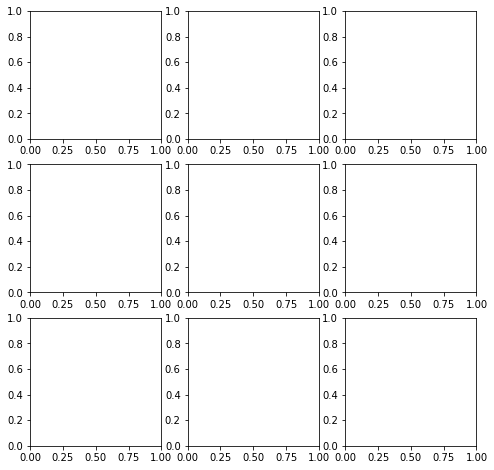

In [29]:
fig, axs = plt.subplots(3,3,figsize = (8,8))

sns.barplot(x=hasil.cluster, y=hasil.child_mort, ax = axs[0,0])
sns.barplot(x=hasil.cluster, y=hasil.exports, ax = axs[0,1])
sns.barplot(x=hasil.cluster, y=hasil.health, ax = axs[0,2])
sns.barplot(x=hasil.cluster, y=hasil.imports, ax = axs[1,0])
sns.barplot(x=hasil.cluster, y=hasil.income, ax = axs[1,1])
sns.barplot(x=hasil.cluster, y=hasil.life_expec, ax = axs[1,2])
sns.barplot(x=hasil.cluster, y=hasil.inflation, ax = axs[2,0])
sns.barplot(x=hasil.cluster, y=hasil.total_fer, ax = axs[2,1])
sns.barplot(x=hasil.cluster, y=hasil.gdpp, ax = axs[2,2])
plt.tight_layout()

In [ ]:
clustered_data_hc[clustered_data_hc.cluster == 0].country.values

# HDBSCAN

In [45]:
!pip install hdbscan

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-0.29.27-py2.py3-none-any.whl (983 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp38-cp38-win32.whl size=503222 sha256=d91bf7238e9d7dd96259d5bdaf5028aff8ceceffa8e9af2666a8d1005527387b
  Stored in directory: c:\users\cbc-user\appdata\local\pip\cache\wheels\26\f2\c2\eab587fff76dc9ffc9a9bf3ca0e44e26d2ef6425264492df65
Successfully built hdbscan


In [ ]:
from hdbscan import HDBSCAN
hdb = HDBSCAN()
hdb.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [ ]:
hdb.labels_

array([-1,  3,  1,  3, -1,  3,  1, -1,  1,  3,  1, -1,  1,  3,  1,  3,  4,
       -1, -1, -1,  4,  3,  1,  3,  1,  3, -1, -1,  4, -1,  1,  3, -1, -1,
        1,  3, -1,  3, -1, -1,  4, -1,  4,  4, -1,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  0, -1,  0,  4,  0,  2,  0,  2,  0,  4,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  4,  0,  2,  0,  4,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

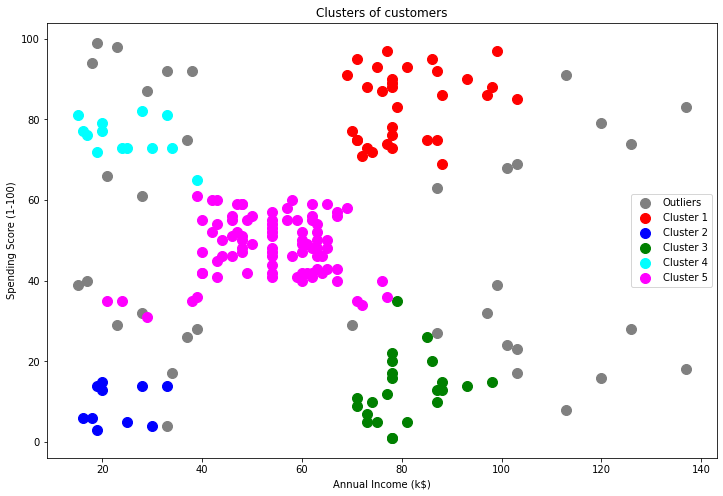

In [ ]:
# Visualising the clusters
plt.figure(figsize=(12,8))
plt.scatter(X[hdb.labels_ == -1, 0], X[hdb.labels_ == -1, 1], s = 100, c = 'grey', label = 'Outliers')
plt.scatter(X[hdb.labels_ == 0, 0], X[hdb.labels_ == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[hdb.labels_ == 1, 0], X[hdb.labels_ == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[hdb.labels_ == 2, 0], X[hdb.labels_ == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[hdb.labels_ == 3, 0], X[hdb.labels_ == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[hdb.labels_ == 4, 0], X[hdb.labels_ == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Isolation Forest

In [46]:
from sklearn.ensemble import IsolationForest

In [47]:
clf = IsolationForest(random_state=0)
clf.fit(X)
y_if = clf.predict(X)

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

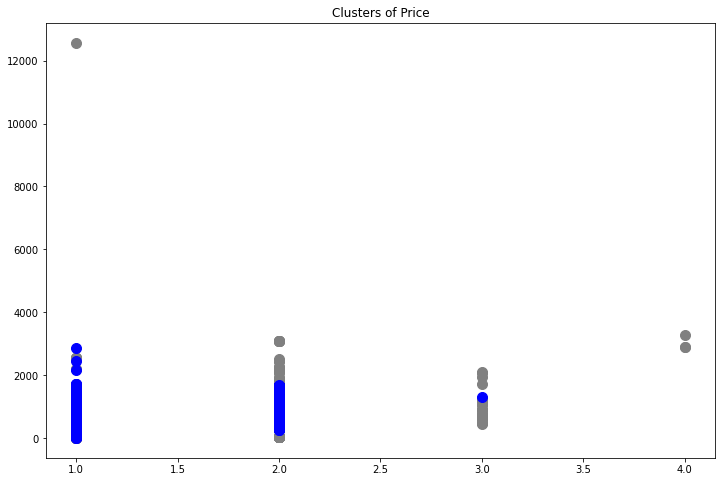

In [48]:
# Visualising the clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_if == -1, 0], X[y_if == -1, 1], s = 100, c = 'grey', label = 'Outliers')
plt.scatter(X[y_if == 1, 0], X[y_if == 1, 1], s = 100, c = 'blue', label = 'Normal')
plt.title('Clusters of Price')
plt.xlabel()
plt.ylabel()
plt.legend()
plt.show()

# Evaluation Metrics

In [57]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_hc)

0.537749740673561

In [56]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_if)

1.6259991203265742

In [53]:
from validclust import dunn
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(X)

In [55]:
dunn(dist, y_hc)

0.0013390110678803274

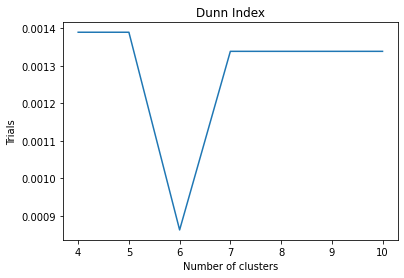

In [54]:
sets = []
for i in range(4, 11):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    dist = pairwise_distances(X)
    val = dunn(dist, y_hc)
    sets.append(val)
plt.plot(range(4, 11), sets)
plt.title('Dunn Index')
plt.xlabel('Number of clusters')
plt.ylabel('Trials')
plt.show()

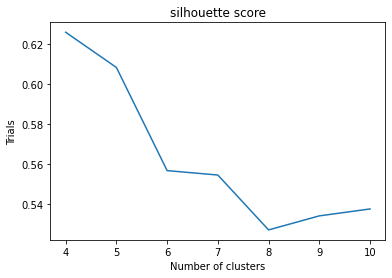

In [49]:
sets = []
for i in range(4, 11):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    val = silhouette_score(X, y_hc)
    sets.append(val)
plt.plot(range(4, 11), sets)
plt.title('silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Trials')
plt.show()